## # Following is the code to predict the account status. I have used the summarized bank statement data for predicting the status.

### Created by : Darshika Kesarwani

In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score,GridSearchCV
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
import pickle 


### Reading both data files

In [3]:

trans = pd.read_csv('account_info.csv')
dv=pd.read_csv('account_labels.csv')

#### Data understanding  -> From the analysis given in the section below, we can observe the following:
1. Data is given for 1000 unique customers
2.Their spend and credit information in given in 10 different caegories
3. Interestingly, there are 10000 observations each in bank statement data for debit and credits, 1000 for each category of debit or credit
3. 148 (14.8%) observations are staus=1

In [4]:

trans.sample(5)

,account_id,category,balance,debits,credits
4530,bXx_cWVqbXRlbGltaWZodHpzZXZ5an5mZHZ6YWhpbHlse2Vl,ATM/Cash Withdrawals,-9959.44,20,0
4504,bXpvf2Z2f3RlaW5pcmZod3JmZXZpbn5maGpqaWtrb2t6fGh0,Mortgages,0.00,0,0
9370,Z217fXdkcmJld2h9aWZoaGtnZXVna2xmaGJwdm91aXp6cXd1,ATM/Cash Withdrawals,0.00,0,0
7179,enpqfHVzfGVlZX1xb2ZoamljZXZwb3FmZWl9an1kb2p6emt2,Overall,25061.66,1678,175
3741,bnF_fmlif2JleXt9bGZodGtoZW1tb3pmdmp8ZXBte21qbHdp,Checks,-118904.39,37,0


In [5]:
dv.sample(5)

,account_id,label
96,bH5ycGtnenRla3p8e2ZodHBkZWx4eWlmdWJsZW5qcHp6fWt1,0
839,aHFve2Z0bGVleXprcmZoYW1iZXVsfWlmZWdyaHt2bGh-a2pz,0
814,eW9ta3plf2Zla3h6e2ZoaXpmZXZ6aWtmaHZpZHx3eGhqbXhz,0
873,bGxqbGxjbHRlZHB9amZoaG9mZWx6eWxmanZ-dH1rbW1_fmVn,0
533,eXl_bW1kempleXl5fGZoZntzZWx9fWpmamNtan5tanx6fm13,0


In [6]:
dv['label'].sum()/dv['label'].count()

0.148

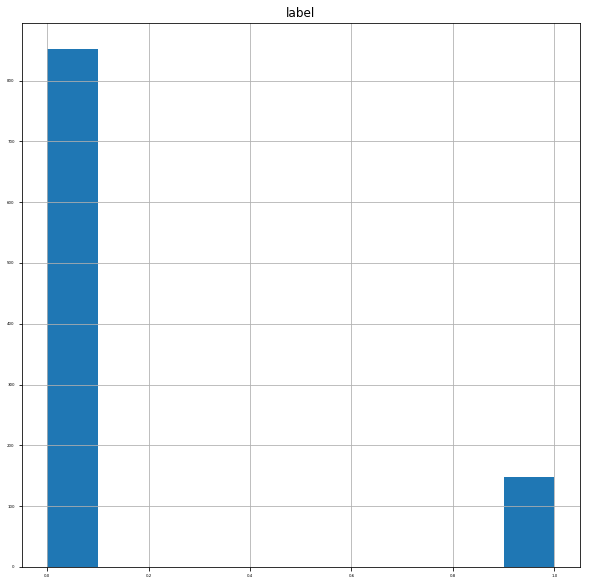

In [7]:
dv.iloc[:,:].hist(xlabelsize=4, ylabelsize=4,figsize=(10,10))
plt.show()

In [8]:
trans.shape

(10000, 5)

In [9]:
dv.shape

(1000, 2)

In [10]:
counts_debit = trans.groupby(["category"]).count().sort_values("account_id", ascending=False)
counts_debit

,account_id,balance,debits,credits
category,,,,
ATM/Cash Withdrawals,1000,1000,1000,1000
Checks,1000,1000,1000,1000
Gasoline/Fuel,1000,1000,1000,1000
Groceries,1000,1000,1000,1000
Mortgages,1000,1000,1000,1000
Overall,1000,1000,1000,1000
Restaurants/Dining,1000,1000,1000,1000
Sales,1000,1000,1000,1000
Taxes,1000,1000,1000,1000


In [11]:
counts_credits = trans.groupby(["category"]).count().sort_values("account_id", ascending=False)
counts_debit

,account_id,balance,debits,credits
category,,,,
ATM/Cash Withdrawals,1000,1000,1000,1000
Checks,1000,1000,1000,1000
Gasoline/Fuel,1000,1000,1000,1000
Groceries,1000,1000,1000,1000
Mortgages,1000,1000,1000,1000
Overall,1000,1000,1000,1000
Restaurants/Dining,1000,1000,1000,1000
Sales,1000,1000,1000,1000
Taxes,1000,1000,1000,1000


### Feature Engineering is done in three stages. Following is the first stage where I have reshaped  the data uniquely for every customers
1. For every customer, I have created features like: 'total debit transactions' and number of debit transactions in each category
2. Similarly, for every customer, I have created features on Credits and Balance for overall and by each category

In [12]:
#Feaature_Engineering


#Debits
data = pd.DataFrame(trans[trans['category'] == 'Overall'].groupby("account_id")['debits'].sum())
data.columns = ['debits']
data[['ATM_Cash_Withdrawals_dr']]= pd.DataFrame(trans[trans['category'] == 'ATM/Cash Withdrawals'].groupby("account_id")['debits'].sum())
data[['Checks_dr']]= pd.DataFrame(trans[trans['category'] == 'Checks'].groupby("account_id")['debits'].sum())
data[['Gasoline/Fuel_dr']]= pd.DataFrame(trans[trans['category'] == 'Gasoline/Fuel'].groupby("account_id")['debits'].sum())
data[['Groceries_dr']]= pd.DataFrame(trans[trans['category'] == 'Groceries'].groupby("account_id")['debits'].sum())
data[['Mortgages_dr']]= pd.DataFrame(trans[trans['category'] == 'Mortgages'].groupby("account_id")['debits'].sum())
data[['Restaurants/Dining_dr']]= pd.DataFrame(trans[trans['category'] == 'Restaurants/Dining'].groupby("account_id")['debits'].sum())
data[['Sales_dr']]= pd.DataFrame(trans[trans['category'] == 'Sales'].groupby("account_id")['debits'].sum())
data[['Taxes_dr']]= pd.DataFrame(trans[trans['category'] == 'Taxes'].groupby("account_id")['debits'].sum())
data[['Wages Paid_dr']]= pd.DataFrame(trans[trans['category'] == 'Wages Paid'].groupby("account_id")['debits'].sum())



#credits
data['credit'] = pd.DataFrame(trans[trans['category'] == 'Overall'].groupby("account_id")['credits'].sum())
data[['ATM_Cash_Withdrawals_cr']]= pd.DataFrame(trans[trans['category'] == 'ATM/Cash Withdrawals'].groupby("account_id")['credits'].sum())
data[['Checks_cr']]= pd.DataFrame(trans[trans['category'] == 'Checks'].groupby("account_id")['credits'].sum())
data[['Gasoline/Fuel_cr']]= pd.DataFrame(trans[trans['category'] == 'Gasoline/Fuel'].groupby("account_id")['credits'].sum())
data[['Groceries_cr']]= pd.DataFrame(trans[trans['category'] == 'Groceries'].groupby("account_id")['credits'].sum())
data[['Mortgages_cr']]= pd.DataFrame(trans[trans['category'] == 'Mortgages'].groupby("account_id")['credits'].sum())
data[['Restaurants/Dining_cr']]= pd.DataFrame(trans[trans['category'] == 'Restaurants/Dining'].groupby("account_id")['credits'].sum())
data[['Sales_cr']]= pd.DataFrame(trans[trans['category'] == 'Sales'].groupby("account_id")['credits'].sum())
data[['Taxes_cr']]= pd.DataFrame(trans[trans['category'] == 'Taxes'].groupby("account_id")['credits'].sum())
data[['Wages Paid_cr']]= pd.DataFrame(trans[trans['category'] == 'Wages Paid'].groupby("account_id")['credits'].sum())


#Balance

data['balance'] = pd.DataFrame(trans[trans['category'] == 'Overall'].groupby("account_id")['balance'].sum())
data[['ATM_Cash_Withdrawals_bl']]= pd.DataFrame(trans[trans['category'] == 'ATM/Cash Withdrawals'].groupby("account_id")['balance'].sum())
data[['Checks_bl']]= pd.DataFrame(trans[trans['category'] == 'Checks'].groupby("account_id")['balance'].sum())
data[['Gasoline/Fuel_bl']]= pd.DataFrame(trans[trans['category'] == 'Gasoline/Fuel'].groupby("account_id")['balance'].sum())
data[['Groceries_bl']]= pd.DataFrame(trans[trans['category'] == 'Groceries'].groupby("account_id")['balance'].sum())
data[['Mortgages_bl']]= pd.DataFrame(trans[trans['category'] == 'Mortgages'].groupby("account_id")['balance'].sum())
data[['Restaurants/Dining_bl']]= pd.DataFrame(trans[trans['category'] == 'Restaurants/Dining'].groupby("account_id")['balance'].sum())
data[['Sales_bl']]= pd.DataFrame(trans[trans['category'] == 'Sales'].groupby("account_id")['balance'].sum())
data[['Taxes_bl']]= pd.DataFrame(trans[trans['category'] == 'Taxes'].groupby("account_id")['balance'].sum())
data[['Wages Paid_bl']]= pd.DataFrame(trans[trans['category'] == 'Wages Paid'].groupby("account_id")['balance'].sum())


data

,debits,ATM_Cash_Withdrawals_dr,Checks_dr,Gasoline/Fuel_dr,Groceries_dr,Mortgages_dr,Restaurants/Dining_dr,Sales_dr,Taxes_dr,Wages Paid_dr,...,balance,ATM_Cash_Withdrawals_bl,Checks_bl,Gasoline/Fuel_bl,Groceries_bl,Mortgages_bl,Restaurants/Dining_bl,Sales_bl,Taxes_bl,Wages Paid_bl
account_id,,,,,,,,,,,,,,,,,,,,,
Z217cWdpaXVlaWtqb2ZoY31mZWxpbXJmdWF7YWxsZ358bWdy,170,6,48,19,2,0,8,0,0,0,...,17465.59,-1900.00,-221404.80,-980.43,-91.87,0.00,-392.71,0.0,0.00,0.0
Z217fXdkcmJld2h9aWZoaGtnZXVna2xmaGJwdm91aXp6cXd1,104,0,0,0,2,0,9,0,0,0,...,10408.87,0.00,0.00,0.00,-27.75,0.00,9656.20,0.0,0.00,0.0
Z21qaWxpamFlaHxwfGZoaH9oZW1sbHJmaWF_YWt5b3l9fWVl,290,1,118,0,0,0,0,0,0,0,...,74677.68,-3000.00,-662028.16,0.00,0.00,0.00,0.00,0.0,0.00,0.0
Z25-bG12amVlZm96e2ZoZXtnZXZvbGpmZnZvaHBpbWpxf2lz,87,0,46,0,0,0,0,0,5,0,...,11754.29,0.00,-131447.69,0.00,0.00,0.00,0.00,0.0,-6206.73,0.0
Z25qbmZzaXVld3tqb2ZoY3x1ZXZ6anBmdWRsdHt6bXBpbGdk,349,18,66,26,4,0,15,0,0,0,...,8488.51,-53855.46,-28852.87,-643.92,-166.88,0.00,-351.23,0.0,0.00,0.0
Z25qenVycnRlZ2dqe2ZoZX9hZXV5bnBmamdydmhsfGp9cndo,309,21,42,19,8,0,47,0,3,0,...,6415.82,-2006.75,-82782.19,-969.84,-355.80,0.00,-1032.66,0.0,-536.02,0.0
Z25tfXdpa2lleGd-cmZoanJ2ZXV5bHFmeWRwd2p1a2hte3hy,197,3,55,8,2,0,24,0,0,0,...,8736.27,-1020.00,-147431.21,-44.39,-17.14,0.00,-191.60,0.0,0.00,0.0
Z25ubGlycmRleHB7e2Zoc2xzZXV9bn9mZGd7Yn1tbW9wb3V2,361,28,3,28,15,0,49,0,0,0,...,5810.57,-1988.85,-454.56,-1441.68,-448.13,0.00,-1015.16,0.0,0.00,0.0
Z296b2l0fGRlen1ocWZoYnF0ZXZ9bnxmZnRpZm5pa2t9bGdy,48,2,6,0,0,0,0,0,4,0,...,55770.88,-980.00,-10144.16,0.00,0.00,0.00,0.00,0.0,-466.08,0.0


# Feature engineering stage 2: 
1. In this stage of feature engineering, I have created min, max, median and average # of transactions based on their data in these 10 category. Idea is to idenify distributions and statistical transformations, which can be helpful in predicting account status
2. This is done for each of three columns (Debit, credit and Balance)
3. Overall is excluded in this part of feature engineering because Overall in not an individual category and this already includes these individual categories

In [13]:

# creating other features

# Max credits across different categories
data['max_credit'] = pd.DataFrame(trans[trans['category'] != 'Overall'].groupby("account_id")['credits'].max())

# Median credit sacross different categories
data['median_credit'] = pd.DataFrame(trans[trans['category'] != 'Overall'].groupby("account_id")['credits'].median())

# average credits across different categories
data['avg_credit'] = pd.DataFrame(trans[trans['category'] != 'Overall'].groupby("account_id")['credits'].mean())

# min credits across different categories
data['min_credit'] = pd.DataFrame(trans[trans['category'] != 'Overall'].groupby("account_id")['credits'].min())


# Max debits across different categories
data['max_debits'] = pd.DataFrame(trans[trans['category'] != 'Overall'].groupby("account_id")['debits'].max())

# Median debits sacross different categories
data['median_debits'] = pd.DataFrame(trans[trans['category'] != 'Overall'].groupby("account_id")['debits'].median())

# average debits across different categories
data['avg_debits'] = pd.DataFrame(trans[trans['category'] != 'Overall'].groupby("account_id")['debits'].mean())

# min debits across different categories
data['min_debits'] = pd.DataFrame(trans[trans['category'] != 'Overall'].groupby("account_id")['debits'].min())



# Max balance across different categories
data['max_balance'] = pd.DataFrame(trans[trans['category'] != 'Overall'].groupby("account_id")['balance'].max())

# Median balance sacross different categories
data['median_balance'] = pd.DataFrame(trans[trans['category'] != 'Overall'].groupby("account_id")['balance'].median())

# average balance across different categories
data['avg_balance'] = pd.DataFrame(trans[trans['category'] != 'Overall'].groupby("account_id")['balance'].mean())

# min balance across different categories
data['min_balance'] = pd.DataFrame(trans[trans['category'] != 'Overall'].groupby("account_id")['balance'].min())




In [34]:
data.head()

,debits,ATM_Cash_Withdrawals_dr,Checks_dr,Gasoline/Fuel_dr,Groceries_dr,Mortgages_dr,Restaurants/Dining_dr,Sales_dr,Taxes_dr,Wages Paid_dr,...,median_balance,avg_balance,min_balance,credit_TO_debit_Overall,avg_credit_TO_Overall_credit,Max_credit_TO_Overall_credit,avg_balance_TO_Overall_balance,Max_balance_TO_Overall_balance),avg_debits_TO_Overall_debits,Max_debits_TO_Overall_debits
account_id,,,,,,,,,,,,,,,,,,,,,
Z217cWdpaXVlaWtqb2ZoY31mZWxpbXJmdWF7YWxsZ358bWdy,170,6,48,19,2,0,8,0,0,0,...,-91.87,-24974.423333,-221404.80,0.088235,0.000000,0.000000,-1.429922,0.00000,0.054248,0.282353
Z217fXdkcmJld2h9aWZoaGtnZXVna2xmaGJwdm91aXp6cXd1,104,0,0,0,2,0,9,0,0,0,...,0.00,1069.827778,-27.75,0.115385,0.009259,0.083333,0.102780,0.92769,0.011752,0.086538
Z21qaWxpamFlaHxwfGZoaH9oZW1sbHJmaWF_YWt5b3l9fWVl,290,1,118,0,0,0,0,0,0,0,...,0.00,-73892.017778,-662028.16,0.196552,0.000000,0.000000,-0.989479,0.00000,0.045594,0.406897
Z25-bG12amVlZm96e2ZoZXtnZXZvbGpmZnZvaHBpbWpxf2lz,87,0,46,0,0,0,0,0,5,0,...,0.00,-15294.935556,-131447.69,0.379310,0.000000,0.000000,-1.301222,0.00000,0.065134,0.528736
Z25qbmZzaXVld3tqb2ZoY3x1ZXZ6anBmdWRsdHt6bXBpbGdk,349,18,66,26,4,0,15,0,0,0,...,-166.88,-9318.928889,-53855.46,0.332378,0.000000,0.000000,-1.097829,0.00000,0.041070,0.189112


### Feature engineering stage 3: In this stage of feature engineering I have created ratio related features.
1. In the interest of time, I was only able to create only few ratio features however, a lot more can be done.
2. I have created Max/Overall and average/Overall ratios for each of the three (Credit, debit and Balance) because I think these are most relevant. This will tell us how much their is on one category vs overall
3. Another feature I have added is overall credit to Overall debit ratio. This Feature is likely to be predictive because it tells financial welness (What percentage of earing goes into spending )

In [14]:

#creating ratio features

data['credit_TO_debit_Overall']= data['credit']/data['debits']

data['avg_credit_TO_Overall_credit']= data['avg_credit']/data['credit']
data['Max_credit_TO_Overall_credit']= data['max_credit']/data['credit']


data['avg_balance_TO_Overall_balance']= data['avg_balance']/data['balance']
data['Max_balance_TO_Overall_balance)']= data['max_balance']/data['balance']


data['avg_debits_TO_Overall_debits']= data['avg_debits']/data['debits']
data['Max_debits_TO_Overall_debits']= data['max_debits']/data['debits']

In [15]:
data.shape

(1000, 49)

## After creating 49 features,  I looked at distribution of features, visualization and basic statiscis of these variables. 
1.From the table below, we can observe the quantile distribution of each variable. We can see one of the max values is going to infinite, so I scaled it down to the maximum. 
2.We can also observe the plot of these variables, we can see that some variables distribution is skewed while others are nortmaly distibuted

In [16]:
data.iloc[:,1:].describe().transpose()





,count,mean,std,min,25%,50%,75%,max
ATM_Cash_Withdrawals_dr,1000.0,1.183300e+01,26.481888,0.000000e+00,0.000000,3.000000,13.000000,4.040000e+02
Checks_dr,1000.0,7.115400e+01,115.221371,0.000000e+00,9.000000,33.000000,81.000000,1.051000e+03
Gasoline/Fuel_dr,1000.0,9.460000e+00,20.689477,0.000000e+00,0.000000,1.500000,10.000000,2.990000e+02
Groceries_dr,1000.0,8.782000e+00,18.655951,0.000000e+00,0.000000,2.000000,9.000000,2.430000e+02
Mortgages_dr,1000.0,3.490000e-01,1.568330,0.000000e+00,0.000000,0.000000,0.000000,2.400000e+01
Restaurants/Dining_dr,1000.0,1.492300e+01,29.178356,0.000000e+00,0.000000,3.000000,17.250000,2.690000e+02
Sales_dr,1000.0,7.000000e-02,1.793967,0.000000e+00,0.000000,0.000000,0.000000,5.600000e+01
Taxes_dr,1000.0,3.802000e+00,15.330878,0.000000e+00,0.000000,0.000000,4.000000,4.180000e+02
Wages Paid_dr,1000.0,3.700000e-02,0.678300,0.000000e+00,0.000000,0.000000,0.000000,1.800000e+01
credit,1000.0,8.295000e+01,125.878668,1.000000e+00,21.000000,46.000000,107.000000,2.623000e+03


In [17]:
m = data.loc[data['credit_TO_debit_Overall'] != np.inf, 'credit_TO_debit_Overall'].max()
data['credit_TO_debit_Overall'].replace(np.inf,m,inplace=True)

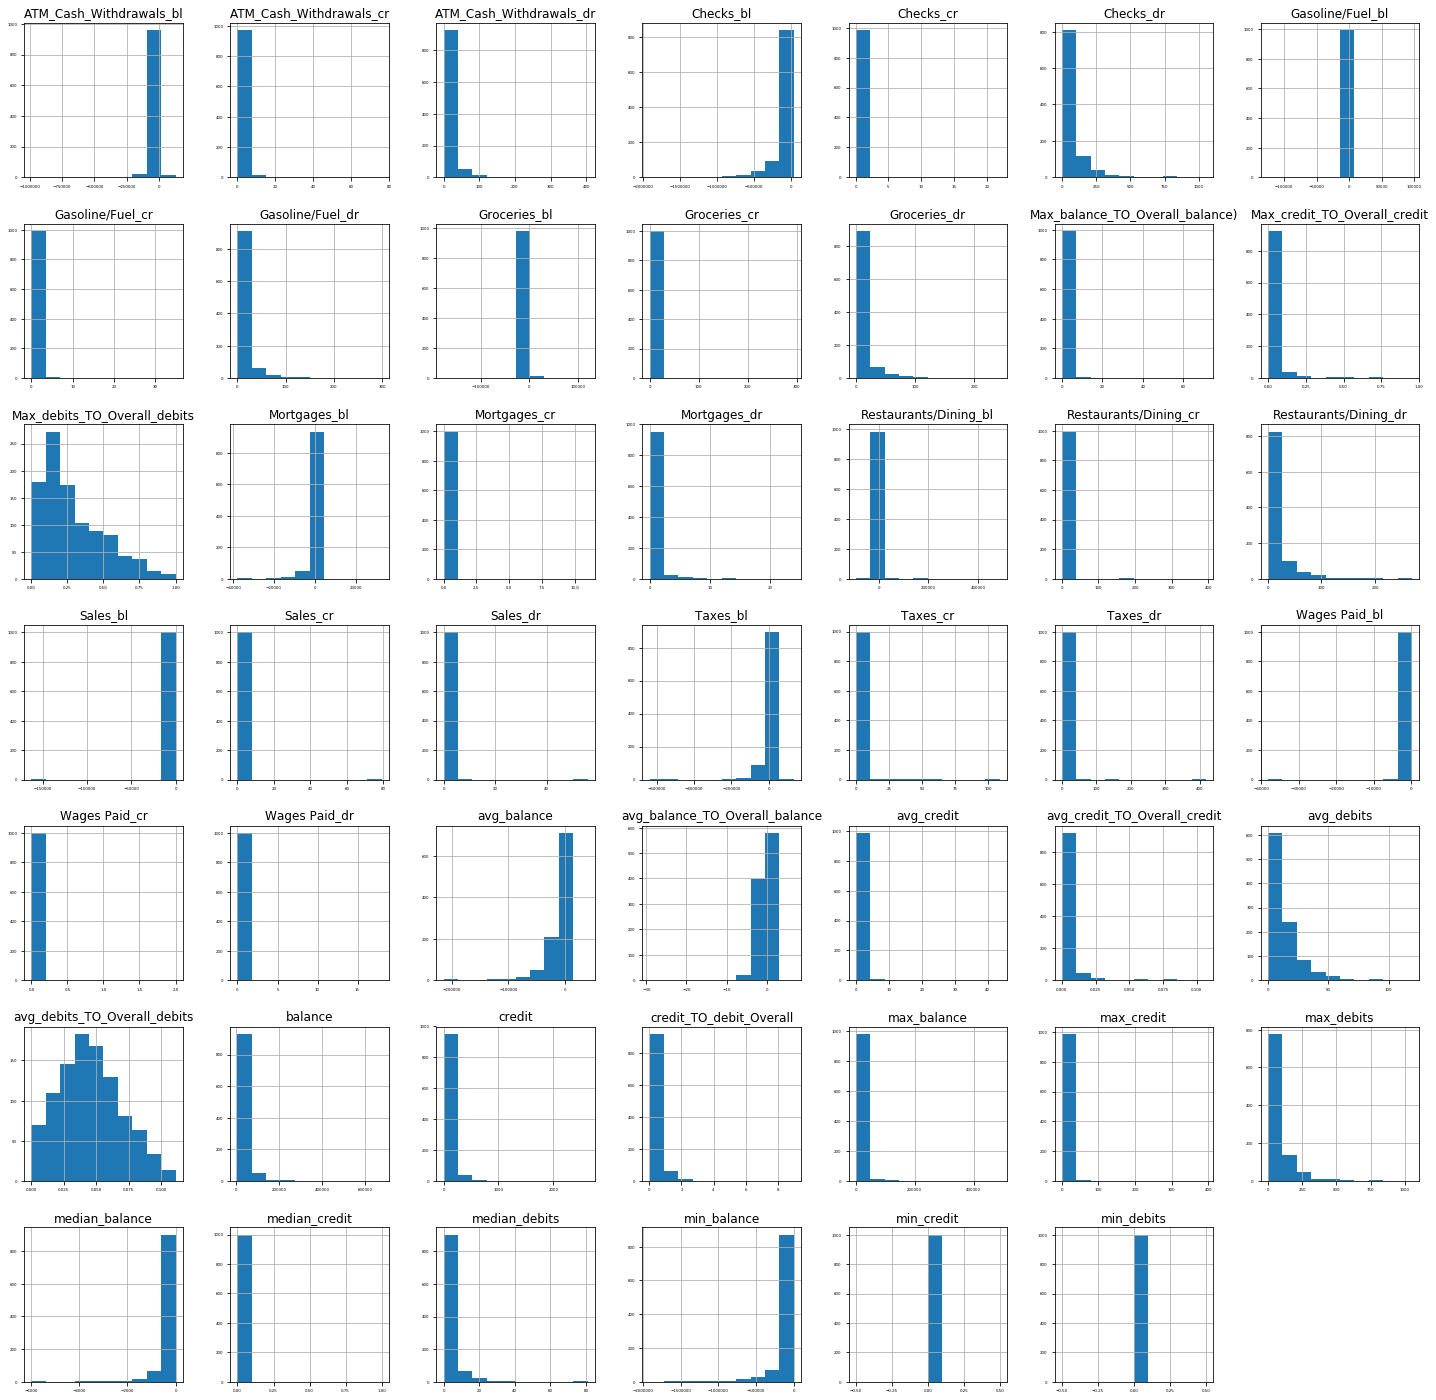

In [18]:
data.iloc[:,1:].hist(xlabelsize=4, ylabelsize=4,figsize=(25,25))
plt.show()

In [19]:
dv.columns = ['account_id','y']
dv.sample(5)

,account_id,y
139,bWl_b2hhcGVlbWhvbGZodn9hZXZ5aG1mZ2h8dXBteWlrcGZn,0
650,aHlsbWVzcXRlZ2pucmZoZGp2ZXVne2pmbWhqc3t2a21vaXV3,0
615,bX56a2V1amFlZ3h-f2ZoZ39nZW1vcH1menRucmhpb3lxenhj,0
200,cH5pe3lhaWJlbXtxbWZoZW53ZW1nan1mbGV8aX54eGx8fHpo,0
734,bX5_amlmfWZlaX1wcWZoZWljZW14enJmZ3dpaG9tbnlvf2lo,0


In [20]:
Train=pd.merge(data, dv, on='account_id', how='inner')
Train.sample(5)

,account_id,debits,ATM_Cash_Withdrawals_dr,Checks_dr,Gasoline/Fuel_dr,Groceries_dr,Mortgages_dr,Restaurants/Dining_dr,Sales_dr,Taxes_dr,...,avg_balance,min_balance,credit_TO_debit_Overall,avg_credit_TO_Overall_credit,Max_credit_TO_Overall_credit,avg_balance_TO_Overall_balance,Max_balance_TO_Overall_balance),avg_debits_TO_Overall_debits,Max_debits_TO_Overall_debits,y
450,bXlycWVkf2Vldm9oaWZod3tqZWx5e3FmeHd6Y31raHlse2pn,233,11,38,3,5,0,18,0,4,...,-8736.828889,-52649.16,0.330472,0.001443,0.012987,-0.247601,0.000000,0.037673,0.163090,0
944,fWh_bXlqf2llbWx7cmZod3JhZXZncHxmanR8YW1leGx8bGlz,43,1,23,0,4,0,2,0,0,...,-1901.497778,-14908.81,0.348837,0.000000,0.000000,-0.154090,0.000000,0.077519,0.534884,0
976,fXFwb21lfHVlant9f2ZoY3x3ZXZ8aHtmdmh_dm9oamhvcXZh,57,1,31,0,0,0,0,0,0,...,-533.253333,-5739.28,0.543860,0.007168,0.032258,-0.030689,0.057551,0.062378,0.543860,0
270,anlqfXdifGZleW5ubGZoaXFnZWxrbX1mZWhxdmtoa3ptb2dl,661,15,43,12,46,0,81,0,0,...,-9069.350000,-66518.46,0.057489,0.005848,0.026316,-1.538811,0.000000,0.033115,0.122542,0
540,cGltf3V1b2dleGdpcGZoYn5jZW1uanpmbGl_aXtseGpqf2do,162,0,20,15,9,0,3,0,4,...,-6539.668889,-51507.15,0.098765,0.000000,0.000000,-0.668882,0.000000,0.034979,0.123457,0


## After doing univariate analysis, I started data preparation for the modeling. 
1. Min max scaling is done on the dataset to normalize it. This is important because some of machine learning models work on distance criteria so same scale is helpful in producing good results
2. After this step, I have also treated NA values with the median. Two columns has 2 values as NA.
3. Created a function to split train and test dataset

In [21]:
def train_test (df, feature_name, test_size, seed):
    """
    Puporse: This function is designed to Split the Data Set
    """
    if feature_name is None:
        X = df[[i for i in df.columns if i!='y']]
    else:
        X = df[feature_name]
    y = df['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    return (X_train, X_test, y_train, y_test)

In [22]:
features = [i for i in Train.columns if  i not in ['account_id','y']]

In [23]:
XTrain=Train.iloc[:,1:56]
scaler = MinMaxScaler()
Train = pd.DataFrame(scaler.fit_transform(XTrain), columns=XTrain.columns)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [24]:
Train.isnull().sum(axis = 0)

debits                             0
ATM_Cash_Withdrawals_dr            0
Checks_dr                          0
Gasoline/Fuel_dr                   0
Groceries_dr                       0
Mortgages_dr                       0
Restaurants/Dining_dr              0
Sales_dr                           0
Taxes_dr                           0
Wages Paid_dr                      0
credit                             0
ATM_Cash_Withdrawals_cr            0
Checks_cr                          0
Gasoline/Fuel_cr                   0
Groceries_cr                       0
Mortgages_cr                       0
Restaurants/Dining_cr              0
Sales_cr                           0
Taxes_cr                           0
Wages Paid_cr                      0
balance                            0
ATM_Cash_Withdrawals_bl            0
Checks_bl                          0
Gasoline/Fuel_bl                   0
Groceries_bl                       0
Mortgages_bl                       0
Restaurants/Dining_bl              0
S

In [25]:
missing_columns=['avg_debits_TO_Overall_debits','Max_debits_TO_Overall_debits']
Train[missing_columns] = Train[missing_columns].fillna(Train[missing_columns].median())

In [26]:
Train.isnull().sum(axis = 0)

debits                             0
ATM_Cash_Withdrawals_dr            0
Checks_dr                          0
Gasoline/Fuel_dr                   0
Groceries_dr                       0
Mortgages_dr                       0
Restaurants/Dining_dr              0
Sales_dr                           0
Taxes_dr                           0
Wages Paid_dr                      0
credit                             0
ATM_Cash_Withdrawals_cr            0
Checks_cr                          0
Gasoline/Fuel_cr                   0
Groceries_cr                       0
Mortgages_cr                       0
Restaurants/Dining_cr              0
Sales_cr                           0
Taxes_cr                           0
Wages Paid_cr                      0
balance                            0
ATM_Cash_Withdrawals_bl            0
Checks_bl                          0
Gasoline/Fuel_bl                   0
Groceries_bl                       0
Mortgages_bl                       0
Restaurants/Dining_bl              0
S

## I have built two models "Random forest" and "Logistic regression" with L1 penalty
1. 70% of sample is used for training the model and 30% for testing
2. 5 fold cross validation methodology is used for tuning the parameters 
3. In random forest, I have used grid serach. I have varied Max_depth,n_estimators and min_sample_leaf parameters, total 112 candidate models were built.
4. For logistic regression, ran on 4 differen parameters. 


# Random Forest Result: Random forest model AUC on training dataset is 0.61 and test dataset is 0.59. KS on test set is 20.5. 
Model is slighly overfitting as traing and slighly higher performance. Dataset is also very small so its obvious.
Feature of inportance plot is also given, Debit & Balance features are more important

In [27]:
# set seed
seed = 1234


X_train, X_test, y_train, y_test = train_test(Train, features, test_size=0.30, seed=seed)

# Grid Search 5-fold
params_grid = {'max_depth':[2,3,4,5,6,7,8],'n_estimators':[10,50,100,150],'min_samples_leaf':[1,2,3,4]}
clf=GridSearchCV(RandomForestClassifier(),params_grid,cv=5, n_jobs=-1,scoring='roc_auc',verbose=3)
# Searching
clf.fit(X_train,y_train)

# returning the results
print("Best parameters: {}".format(clf.best_params_))
print("Best Training AUC score: {}".format(clf.best_score_))
best_rfc_model = clf.best_estimator_

# set scores to probability for roc score calculation
y_score =best_rfc_model.predict_proba(X_test)[:,1]
fpr_score, tpr_score, _ = roc_curve(y_test, y_score)
rocaucscores = auc(fpr_score, tpr_score)
ks = max(tpr_score-fpr_score)
print('Test set RFC AUC: {}'.format(rocaucscores))
print('Test Set KS: {}'.format(ks))

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   37.2s


Best parameters: {'max_depth': 4, 'min_samples_leaf': 4, 'n_estimators': 10}
Best Training AUC score: 0.6208328103316142
Test set RFC AUC: 0.5851641861563903
Test Set KS: 0.1705646113867234


[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:   41.7s finished
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


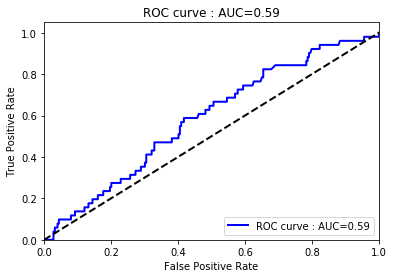

In [28]:
from sklearn import metrics
fpr_score, tpr_score, _ = roc_curve(y_test, y_score)
AUC = metrics.auc(fpr_score, tpr_score)
plt.plot(fpr_score, tpr_score, color='b', lw=2, label='ROC curve : AUC={0:0.2f}'.format(AUC))
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve : AUC={0:0.2f}'.format(AUC))
plt.legend(loc="lower right");

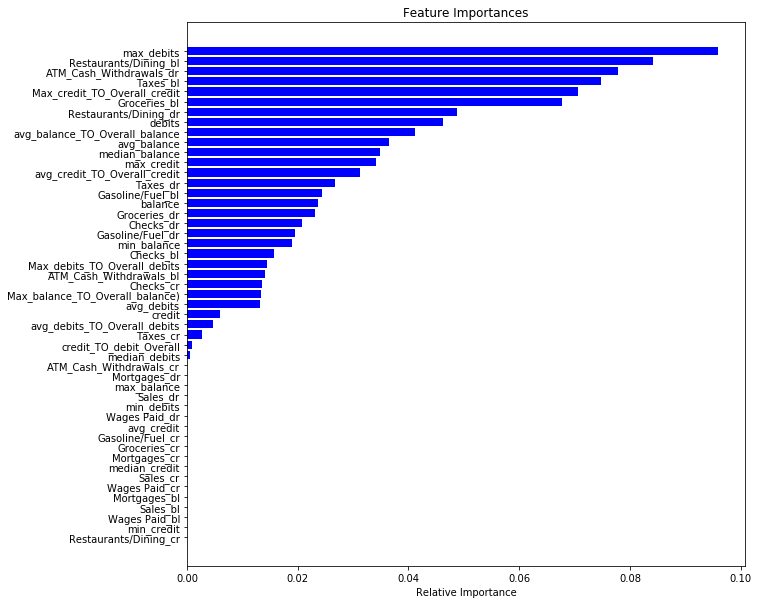

In [29]:
importances = best_rfc_model.feature_importances_
indices = np.argsort(importances)
from matplotlib.pyplot import figure
figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()




### Logistic regression Result: Model AUC on training dataset is 0.6 and test dataset is 0.55. KS on test set is 14.7.
Model is slighly overfitting as traing and slighly higher performance. Dataset is also very small.

In [30]:
seed = 123456
X_train, X_test, y_train, y_test = train_test(Train, features, test_size=0.30, seed=seed)
# Grid Search 5-fold
params_grid = {'C':[1, 0.1, 0.01, 0.001],'penalty':['l1'],'solver':['liblinear']} #change to l2 if you would like to 
clf=GridSearchCV(LogisticRegression(tol=1e-6),params_grid,cv=5, scoring='roc_auc',n_jobs=-1,verbose=2)
# Searching
clf.fit(X_train,y_train)

print("Best parameters: {}".format(clf.best_params_))
print("Best score: {}".format(clf.best_score_))
best_lg_model = clf.best_estimator_
y_score =best_lg_model.predict_proba(X_test)[:,1]
fpr_score, tpr_score, _ = roc_curve(y_test, y_score)
rocaucscores = auc(fpr_score, tpr_score)
ks = max(tpr_score-fpr_score)
print('Logistics AUC: {}'.format(rocaucscores))
print('KS: {}'.format(ks))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  20 | elapsed:    0.7s remaining:    0.4s


Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.6050559884970937
Logistics AUC: 0.5563141538751295
KS: 0.14784819662868448


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.1s finished
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Conclusion: Based on these two models, we can observe that status can be predicted using banking data. Random forest perform better than Logistic regression. Although accuracy is low, with more feature engineering, model can be improved.

 # Reference:
 https://github.com/rohitshekhar/house-prices

https://www.kaggle.com/gauravgulati9c/lending-insights-for-beginners-by-beginner

https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum/39923815

https://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting

http://cs231n.github.io/python-numpy-tutorial/

https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

https://stackoverflow.com/questions/53544996/hyperparameter-tuning-in-random-forest

https://www.geeksforgeeks.org/understanding-logistic-regression/

https://stackoverflow.com/questions/50773107/how-to-replace-infinite-value-with-maximum-value-of-a-pandas-column

